In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import seaborn as sns
from decimal import Decimal
plt.style.use('science')
plt.rcParams['figure.figsize'] = (6, 7)
plt.rcParams['font.size'] = 14
from neutrons.process.data_processor import TotalProcessor, AbsorptionProcessor
from scipy.integrate import  cumulative_trapezoid
from neutrons.process import angular_processor

H_data_a = pd.read_csv('../data/h_cross_a.txt',sep=r'\s+')
H_data_t = pd.read_csv('../data/h_cross_t.txt',sep=r'\s+')
H_data_s = pd.read_csv('../data/h_cross_s.txt',sep=r'\s+')

O_data_a = pd.read_csv('../data/o_cross_a.txt',sep=r'\s+')
O_data_t = pd.read_csv('../data/o_cross_t.txt',sep=r'\s+')
O_data_s = pd.read_csv('../data/o_cross_s.txt',sep=r'\s+')
processor = TotalProcessor([H_data_t, O_data_t])

H_data_angular = pd.read_csv('../data/H_angular.txt',sep=r'\s+')
O_data_angular = pd.read_csv('../data/O_angular.txt',sep=r',')


def convert_number(s):
    print(s)
    if '-' in s:
        index = s.rfind('-')
        s = s[:index] + 'e-' + s[index+1:]
    elif '+' in s:
        index = s.rfind('+')
        s = s[:index] + 'e' + s[index+1:]
    return float(s)


/tmp/ipykernel_56461/890576839.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def legendre_series(coeffs):
    coeffs = [coef * (2*(i+1)+1)/2 for i, coef in enumerate(coeffs)]
    coeffs.insert(0, 0.5)
    return coeffs

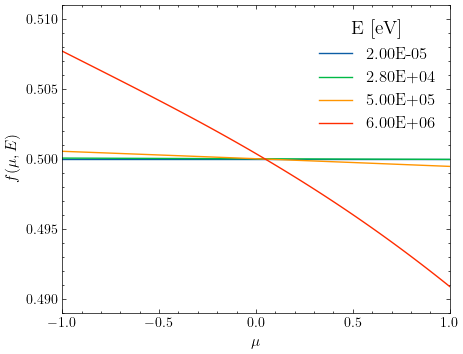

In [3]:
plt.figure(figsize=(5, 4))
x =np.linspace(-1, 1, 100)
for i in range(1, H_data_angular.shape[0], 40):
    coeffs = legendre_series(list(H_data_angular.iloc[i, 1:]))
    plt.plot(x, np.polynomial.legendre.legval(x, coeffs), label= f"{'%.2E' % Decimal(H_data_angular.iloc[i, 0])}")

plt.xlim(-1, 1)    
plt.legend(title='E [eV]', fontsize=12)
plt.xlabel(r'$\mu $', fontsize=11)
plt.ylabel(r'$f(\mu, E)$', fontsize=11)
plt.ylim(0.489, 0.511)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#plt.title("Scattering angular distribution for H-n collisions (CM frame)")
plt.show()

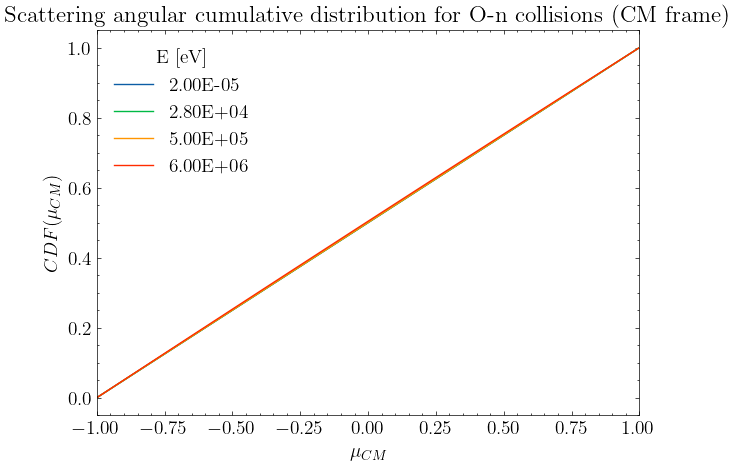

In [4]:
plt.figure(figsize=(7, 5))
x = np.linspace(-1, 1, 100)
for i in range(1, H_data_angular.shape[0], 40):
    coeffs = legendre_series(list(H_data_angular.iloc[i, 1:]))
    pdf = np.polynomial.legendre.legval(x, coeffs)
    cdf = cumulative_trapezoid(pdf, x, initial=0)
    plt.plot(x, cdf, label= f"{'%.2E' % Decimal(H_data_angular.iloc[i, 0])}")

plt.xlim(-1, 1)    
plt.legend(title='E [eV]')
plt.xlabel(r'$\mu_{CM} $')
plt.ylabel(r'$CDF(\mu_{CM})$')
plt.title("Scattering angular cumulative distribution for O-n collisions (CM frame)")
plt.show()

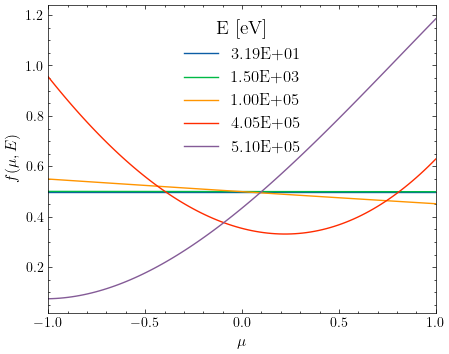

In [5]:
plt.figure(figsize=(5, 4))
x =np.linspace(-1, 1, 100)
plt.xticks(fontsize=10)
for i in range(1, O_data_angular.shape[0]//14, 20):
    coeffs = legendre_series(list(O_data_angular.iloc[i, 1:]))
    plt.plot(x, np.polynomial.legendre.legval(x, coeffs), label= f"{'%.2E' % Decimal(O_data_angular.iloc[i, 0])}")

plt.xlim(-1, 1)    
plt.legend(title='E [eV]', fontsize=12)
plt.xlabel(r'$\mu $', fontsize=11)
plt.ylabel(r'$f(\mu, E)$', fontsize=11)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#plt.title("Scattering angular distribution for O-n collisions (CM frame)")
plt.show()

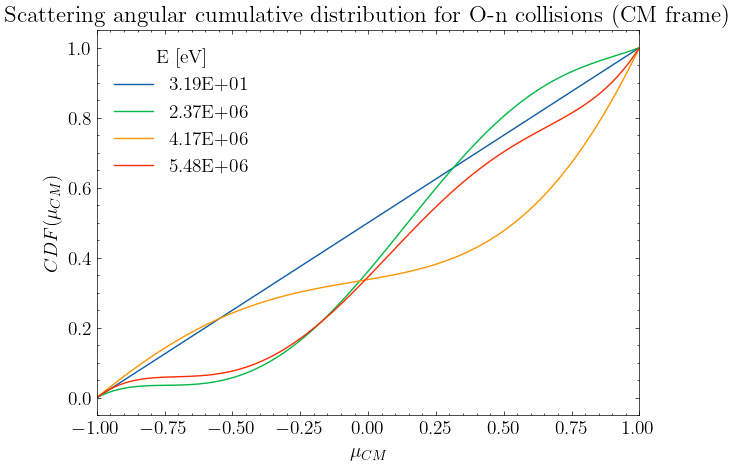

In [6]:
plt.figure(figsize=(7, 5))
x = np.linspace(-1, 1, 100)
for i in range(1, O_data_angular.shape[0], 300):
    coeffs = legendre_series(list(O_data_angular.iloc[i, 1:]))
    pdf = np.polynomial.legendre.legval(x, coeffs)
    cdf = cumulative_trapezoid(pdf, x, initial=0)
    plt.plot(x, cdf, label= f"{'%.2E' % Decimal(O_data_angular.iloc[i, 0])}")

plt.xlim(-1, 1)    
plt.legend(title='E [eV]')
plt.xlabel(r'$\mu_{CM} $')
plt.ylabel(r'$CDF(\mu_{CM})$')
plt.title("Scattering angular cumulative distribution for O-n collisions (CM frame)")
plt.show()

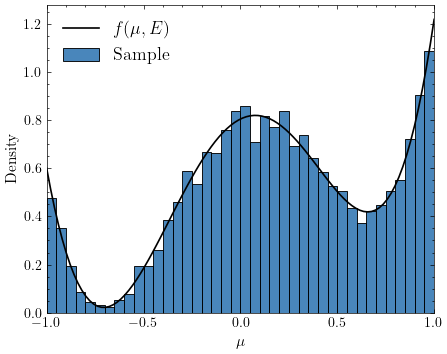

In [27]:
proc = angular_processor.AngularProcessor([H_data_angular, O_data_angular], masses=[1, 16])
angles = proc.get_CM_cosines(16, E=5.48e6, num_samples=10000)

plt.figure(figsize=(5, 4))
for i in range(1, O_data_angular.shape[0], 20):
    if O_data_angular.iloc[i, 0] == 5.48e6:
        coeffs = legendre_series(list(O_data_angular.iloc[i, 1:]))
        plt.plot(x, np.polynomial.legendre.legval(x, coeffs), color="k", linewidth = 1.2, label="$f(\mu, E)$")



sns.histplot(angles, bins=40, stat="density", label = "Sample")
plt.xlabel(r"$\mu$", fontsize = 11)
plt.xlim(-1, 1)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Density", fontsize=11)
plt.legend(fontsize=13, loc="upper left")
plt.show()

ValueError: invalid callable given

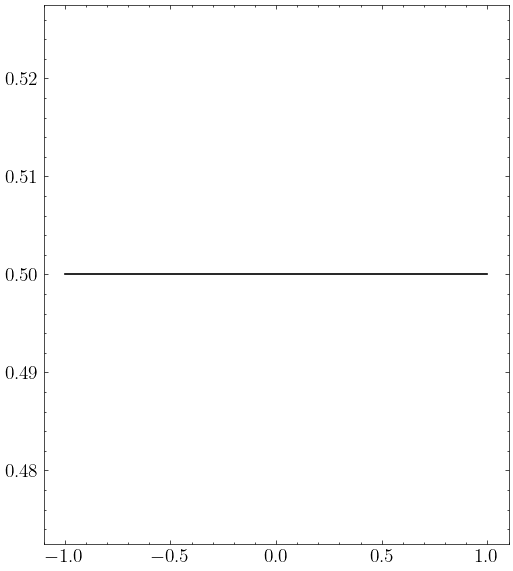

In [30]:
import scipy.integrate as integrate

for i in range(1, O_data_angular.shape[0], 20):
    coeffs = legendre_series(list(O_data_angular.iloc[i, 1:]))
    poly = np.polynomial.legendre.Legendre(coeffs)
    plt.plot(x, np.polynomial.legendre.legval(x, coeffs), color="k", linewidth = 1.2, label="$f(\mu, E)$")
    print(integrate.quad(poly, -1, 1))